# Module 4 - Fremtids scenarier (feat ToboxModel)

In this week's exercises we are looking into the future - simulating the temperature evolution into year 2100 using the 2boxmodel. 

The future projections are based on four different emission scenarios: RCP2.6 (low emmision), RCP4.5 (Intermediate emissions), RCP6 (Intermediate emissions) and RCP8.5 (high emissions). These are used in the previous IPCC report (AR5 2013). You can read more about the Representative Concentration Pathways (RCPs) here: https://skepticalscience.com/rcp.php  

In this exercise, we will focus on the RCP2.6 (optimitic) and RCP8.5 (pesimistic) scenarios. 

<img src="Bilder/RCPs.png" style="width:50%">


In [25]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook # inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

The future data is stored in the "futureForcing.csv" file. As in the previous exercises we load this into a DataFrame (df). This DataFrame contains the radiative forcing associated with four RCP scenarios. 
As you can see if you print the dataframe each scenario contains a total radiative forcing, and is not separated into contributions from greenhouse gases, solar radiations, volcanic activity, agriculture and aerosols. 
The forcing runs from year 1750 to 2100, i.e. also covering the historical period, which we have looked at so far.  

In [3]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('futureForcing.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Radiative forcing in W/m2 \n \n', df)

Radiative forcing in W/m2 
 
         RCP2.6  RCP4.5  RCP6.0  RCP8.5
year                                  
1751.0  -0.021  -0.021  -0.021  -0.021
1752.0  -0.023  -0.023  -0.023  -0.023
1753.0  -0.023  -0.023  -0.023  -0.023
1754.0  -0.026  -0.026  -0.026  -0.026
1755.0  -0.027  -0.027  -0.027  -0.027
...        ...     ...     ...     ...
2086.0   2.424   3.752   4.492   6.802
2087.0   2.428   3.759   4.529   6.884
2088.0   2.432   3.766   4.566   6.966
2089.0   2.436   3.773   4.603   7.048
2090.0   2.440   3.780   4.640   7.130

[340 rows x 4 columns]


## Future projections with the 2box model 

Create two experiments:

* Run#1:'RCP2.6', use the radiative forcing from RCP2.6

* Run#2:'RCP8.5', use the radiative forcing from RCP8.5


Below we compute the temperature change resulting from all the listed radiative forcings: greenhouse gases, solar activity, volcanic activity, agricultur, and aerosols. For the other parameters, we use the same values than in module 2 (ie, a mean of the values used by validated earth system models). We'll call this first experiment our "control run". The temperature change is then saved in the DataFrame under the index "control". By saving later experiment the same way, it will be easy to compare them later.

To create a new experiment, copy and paste the cell below. Change the parameters that need to be changed, and remember to change the index "control".

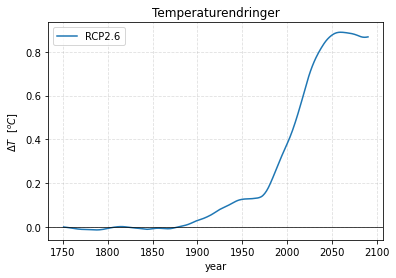

In [21]:
#/RCP2.6//////////////////////////////////////////////////////////////////////////////////////////////////////////////
                                                                                                                    #//
# Radiative forcing                                                                                       #//
total_forcing = df['RCP2.6']                                                                                                 #//
                                                                                                                    #//
# feedback parameters                                                                                                        #//
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       #//
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  #//
lambda_water=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   #//
lambda_cloud=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                        #//
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]                                #//
lambda_other=0.0       # Other feedbacks [Wm-2K-1]                                                                  #//
                                                                                                                    #//
lambda_sum=sum([lambda_planck,                                                                                      #//
    lambda_lapse,                                                                                                   #//
    lambda_water,                                                                                                   #//
    lambda_cloud,                                                                                                   #//
    lambda_albedo,                                                                                                  #//
    lambda_other])                                                                                                  #//
                                                                                                                    #//
# Deep ocean heat uptake efficency [Wm-2K-1]                                                                        #//                                                                                                   #//
gamma=-0.69  # best guesses [-1 to -0.5]                                                                            #//
                                                                                                                    #//
# konverter dataframe til data-array                                                                                #//
radiative_forcing = total_forcing.to_numpy()                                                                        #//     
                                                                                                                    #//
# kaller opp funksjonen som regner ut temperaturendringene                                                          #//
df['Ts_RCP2.6'], To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                                  #//
                                                                                                                    #//
df['Ts_RCP2.6'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer", label = 'RCP2.6')                                       #//
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      #//
plt.grid(alpha=0.4, ls='--') 
plt.legend() 

# deleting variables that will be re-used. Not necessary but it can help to avoid mistakes                          #//
del total_forcing                                                                                                   #//
del lambda_planck, lambda_lapse, lambda_water, lambda_cloud, lambda_albedo, lambda_other, lambda_sum, gamma         #//
                                                                                                                    #//
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#/RCP8.5//////////////////////////////////////////////////////////////////////////////////////////////////////////////   

With no suprise (since we used the same parameters), we obtain the same temperature change than in modul2. As in modul2, we can evaluate the temperature anomalies with respect to the reference time period 1850-1900 and select the temperature change at a specific year.

<u>Reminder:</u> 

You can select a time period year1:year2 in a DataFrame by typing **DataFrameName['variable_name'].loc[year1:year2]**

You can compute the mean of the variable for that time period by doing **DataFrameName['variable_name'].loc[year1:year2].mean**

**NewObject = DataFrameName['VariableName']+some operations** will create a new DataFrame 

while  **DataFrameName['VariableName2']=DataFrameName['VariableName']+some  operations** adds one variable/column (with index VariableName2) to the preexisting DataFrame .

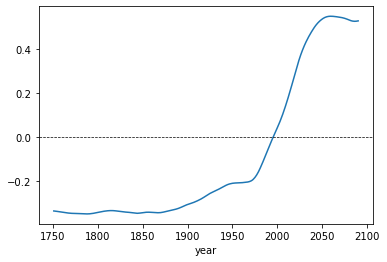

In [22]:
# the temperature anomalies with respect to one time period is done below in one line:
Tanom =  df['Ts_RCP2.6']- df['Ts_RCP2.6'].loc[1986:2005].mean() # temp. anomaly
# make plot
Tanom.plot()
plt.axhline(y=0, linewidth=0.7, color="black", ls='--')

In [26]:
# selecting the temperature change at one specific year
# below we use the temperature anomalies with respect to 1850-1900
year = 2090
Tloc = Tanom.loc[year]
print('Temperature change at year', year, ':', "%.2f" %(Tloc),'°C')

Temperature change at year 2090 : 0.53 °C


## Questions

### 1 - Investigate the temperature change into the future

* Plot the radiative forcing for RCP2.6 and RCP8.5 (in the same plot). Repeat for the temperature change (Ts). 

* Calculate the change in surface temperature relative to year 1986-2005 (same as used by IPCC AR5)

* What is the radiative forcing and temperature change in year 2090 for RCP2.6 and RCP8.5, respectively?

* How does the results from the simple 2box model compare to projection from coupled climate models (see figure below)

<img src="Bilder/AR5-temp-change-to-2100.png" style="width:50%" >

* Discuss the main uncertainties associated with our climate model projections 

### 2 - Investigate the role of the ocean for the temperature evolution

* How does switching the ocean heat uptake on/off impact the modeled temperature response?

* What determines the strength of the ocean heat uptake in the 2box model? 
    * HINT: look at eq. 1, Module 1


In [ ]:
# Ploting the 2 experiments temperature change: (remove the #s)

#df['control'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")  
#df['NoHumanActivity'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer") 
#df['NoVolcanoes'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer")  
#plt.legend()